In [2]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cbsa_data = pd.read_csv('/Users/jericho/Documents/csi/family-geog/data/clean/cbsa/cbsa_summary.csv')
cbsa_data['GTCBSA'] = cbsa_data['GTCBSA'].astype(str).apply(lambda x: x.zfill(5))
cbsa_data.head(3)

cbsa_data.columns.tolist()

['GTCBSA',
 'NAME',
 'ALAND',
 'SQRT_ALAND',
 'POP',
 'LOG_POP',
 'POP_DEN',
 'L_POPDEN',
 'POP15',
 'L_POP15DEN',
 'LOG_POP15',
 'POP15_DEN',
 'TUFINLWGT',
 'NEW_WEIGHT',
 'AVG_FAMILY_TIME',
 'AVG_FAMILY_TIME_UNWEIGHTED',
 'AVG_FAMILY_TIME_ADJUSTED',
 'AVG_FAMILY_NONWORK_TIME',
 'AVG_FAMILY_NONWORK_TIME_UNWEIGHTED',
 'AVG_FAMILY_NONWORK_TIME_ADJUSTED',
 'AVG_FAMILY_IX',
 'AVG_FAMILY_IX_UNWEIGHTED',
 'AVG_FAMILY_IX_ADJUSTED',
 'AVG_HHFAMILY_TIME',
 'AVG_HHFAMILY_TIME_UNWEIGHTED',
 'AVG_HHFAMILY_TIME_ADJUSTED',
 'AVG_HHFAMILY_NONWORK_TIME',
 'AVG_HHFAMILY_NONWORK_TIME_UNWEIGHTED',
 'AVG_HHFAMILY_NONWORK_TIME_ADJUSTED',
 'AVG_HHFAMILY_IX',
 'AVG_HHFAMILY_IX_UNWEIGHTED',
 'AVG_HHFAMILY_IX_ADJUSTED',
 'AVG_NHFAMILY_TIME',
 'AVG_NHFAMILY_TIME_UNWEIGHTED',
 'AVG_NHFAMILY_TIME_ADJUSTED',
 'AVG_NHFAMILY_NONWORK_TIME',
 'AVG_NHFAMILY_NONWORK_TIME_UNWEIGHTED',
 'AVG_NHFAMILY_NONWORK_TIME_ADJUSTED',
 'AVG_NHFAMILY_IX',
 'AVG_NHFAMILY_IX_UNWEIGHTED',
 'AVG_NHFAMILY_IX_ADJUSTED',
 'AVG_FRIEND_TIME'

In [4]:
# Import & Clean CBSA Population Data

def bin_equal(array,bins):
    amin,amax = min(array),max(array)
    step = (amax-amin)/bins
    bins = [(i-amin)//step for i in array]
    mbin = max(bins)
    bin_partitions = [amin+step*i for i in range(int(mbin)+2)]
    return bins, bin_partitions

cbsa_data = pd.read_csv('/Users/jericho/Documents/csi/family-geog/data/clean/cbsa/cbsa_summary.csv')
cbsa_data['GTCBSA'] = cbsa_data['GTCBSA'].astype(str).apply(lambda x: x.zfill(5))
cbsa_data.head(3)

cbsa_df = copy.deepcopy(cbsa_data[['GTCBSA', 'POP', 'LOG_POP', 'AVG_FAMILY_TIME', 'AVG_NHFAMILY_IX', 
            'AVG_FAMILY_IX','AVG_NHFAMILY_NONWORK_TIME', 'AVG_FRIEND_NONWORK_TIME', 
            'AVG_CCC_NONWORK_TIME', 'AVG_NHSOCIAL_TIME', 'AVG_NHFAMILY_SOCIAL_TIME_RATIO']])

bins,partitions = bin_equal(cbsa_df['LOG_POP'],6)
cbsa_df['bin'] = bins
cbsa_df['sum'] = cbsa_df['AVG_NHFAMILY_NONWORK_TIME'] + cbsa_df['AVG_FRIEND_NONWORK_TIME'] + cbsa_df['AVG_CCC_NONWORK_TIME']
cbsa_df.head(3)

GTCBSA     POP  LOG_POP  AVG_FAMILY_TIME  AVG_NHFAMILY_IX  AVG_FAMILY_IX  \
0  10180  170669     5.23           253.28             0.40           0.79   
1  10420  703845     5.85           369.38             0.29           0.77   
2  10580  880736     5.94           377.14             0.20           0.80   

   AVG_NHFAMILY_NONWORK_TIME  AVG_FRIEND_NONWORK_TIME  AVG_CCC_NONWORK_TIME  \
0                      48.25                    17.26                 20.73   
1                     111.31                    59.74                  8.78   
2                      57.75                    19.95                  3.53   

   AVG_NHSOCIAL_TIME  AVG_NHFAMILY_SOCIAL_TIME_RATIO  bin     sum  
0              86.24                            0.33  0.0   86.24  
1             179.83                            0.25  2.0  179.83  
2              81.23                            0.17  2.0   81.23

In [17]:
partitions

[4.96,
 5.348333333333334,
 5.736666666666666,
 6.125,
 6.513333333333334,
 6.901666666666667,
 7.29]

In [5]:
resp_df = pd.read_csv('~/Documents/csi/family-geog/data/clean/atus_responses_2016-2019.csv')
resp_all = resp_df
resp_fam = resp_df[resp_df['NHFAMILY_IX']==1]
resp_nonfam = resp_df[resp_df['NHFAMILY_IX']==0]


def format_print_times(df):
    print('%-25s %5.2f'%('NHFAMILY_NONWORK_TIME',df['NHFAMILY_NONWORK_TIME'].mean()))
    print('%-25s %5.2f'%('CCC_NONWORK_TIME',df['CCC_NONWORK_TIME'].mean()))
    print('%-25s %5.2f'%('FRIEND_NONWORK_TIME',df['FRIEND_NONWORK_TIME'].mean()))
    print('%-25s %5.2f'%('NHSOCIAL_TIME',df['NHSOCIAL_TIME'].mean()))
    print('%-25s %5.2f'%('Count',len(df)))
    print()

print('ALL')
format_print_times(resp_all)
print('FAM=1')
format_print_times(resp_fam)
print('FAM=0')
format_print_times(resp_nonfam)


ALL
NHFAMILY_NONWORK_TIME     64.11
CCC_NONWORK_TIME           6.08
FRIEND_NONWORK_TIME       44.81
NHSOCIAL_TIME             115.00
Count                     39744.00

FAM=1
NHFAMILY_NONWORK_TIME     251.47
CCC_NONWORK_TIME           2.86
FRIEND_NONWORK_TIME       42.05
NHSOCIAL_TIME             296.39
Count                     10132.00

FAM=0
NHFAMILY_NONWORK_TIME      0.00
CCC_NONWORK_TIME           7.18
FRIEND_NONWORK_TIME       45.75
NHSOCIAL_TIME             52.93
Count                     29612.00



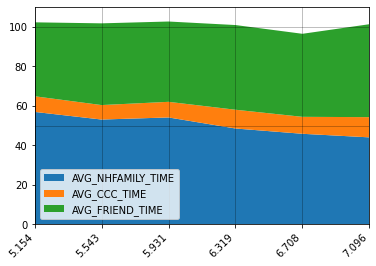

In [6]:


vars = ['AVG_NHFAMILY_NONWORK_TIME','AVG_FRIEND_NONWORK_TIME','AVG_CCC_NONWORK_TIME','AVG_NHSOCIAL_TIME']
x = [(partitions[i]+partitions[i+1])/2 for i in range(len(partitions)-1)]
cbsa_bins = cbsa_df.groupby('bin').mean()

cbsa_bins = cbsa_bins[vars]
cbsa_bins
color_map = ['grey','darkgrey','lightgrey']
plt.stackplot(x, cbsa_bins['AVG_NHFAMILY_NONWORK_TIME'], cbsa_bins['AVG_CCC_NONWORK_TIME'], cbsa_bins['AVG_FRIEND_NONWORK_TIME'], labels=['AVG_NHFAMILY_TIME', 'AVG_CCC_TIME', 'AVG_FRIEND_TIME'])#,colors=color_map)
plt.legend(loc='lower left')#,bbox_to_anchor=(0.4, 0, 0.5, 0.5))
#plt.yscale('log')
plt.ylim((0,110))
plt.xlim((x[0],x[-1]))

for i in range(1,6):
    plt.plot(x, [50*i for j in range(len(x))], c='black', linewidth=0.5,alpha=0.5)


for i in x:
    plt.axvline(x=i,c='black',linewidth=0.5,alpha=0.5)

plt.xticks(x,rotation=45,ha='right')
plt.show()

### To-do

1. Use respondent data for the aggregation, but bin them by the population of the CBSA they belong to
2. Reverse %native var 
3. generate logpop bins for %native var (associate with population)
4. Pull refreshed data from git & rerun

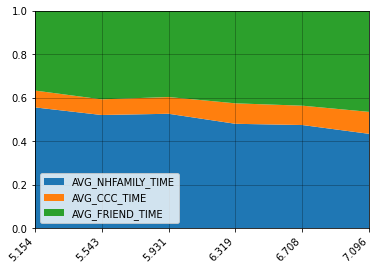

In [7]:
nhfam  = cbsa_bins['AVG_NHFAMILY_NONWORK_TIME']
cowork = cbsa_bins['AVG_CCC_NONWORK_TIME']
friend = cbsa_bins['AVG_FRIEND_NONWORK_TIME']

sum_time = [nhfam[i]+cowork[i]+friend[i] for i in range(len(nhfam))]

nhfam_norm  = [nhfam[i]/sum_time[i] for i in range(len(sum_time))]
cowork_norm = [cowork[i]/sum_time[i] for i in range(len(sum_time))]
friend_norm = [friend[i]/sum_time[i] for i in range(len(sum_time))]

plt.stackplot(x, nhfam_norm, cowork_norm, friend_norm, labels=['AVG_NHFAMILY_TIME', 'AVG_CCC_TIME', 'AVG_FRIEND_TIME'])#,colors=color_map)
plt.legend(loc='lower left')#,bbox_to_anchor=(0.4, 0, 0.5, 0.5))
#plt.yscale('log')
plt.ylim((0,1))
plt.xlim((x[0],x[-1]))

for i in range(1,6):
    plt.plot(x, [50*i for j in range(len(x))], c='black', linewidth=0.5,alpha=0.5)

for i in x:
    plt.axvline(x=i,c='black',linewidth=0.5,alpha=0.5)

for i in range(1,5):
    plt.axhline(y=i*0.2, c='black',linewidth=0.5,alpha=0.5)

plt.xticks(x,rotation=45,ha='right')
plt.show()

In [8]:
# user to specify
pct_max = 95 # for example, max percentile of color ramp
pct_min = 20 # for example, min percentile of color ramp
ramp = plt.cm.YlGnBu # for example

# number of items in data source
n = 3

# list of values between 0.00 and 1.00; length equals length of data source
n_prop = list(i / 100.0 for i in (np.arange(pct_min, pct_max, (pct_max-pct_min)/n)))

# create list of colors
clr_lst = []
for i in n_prop:
    clr = ramp(i) 
    clr_lst.append(clr)

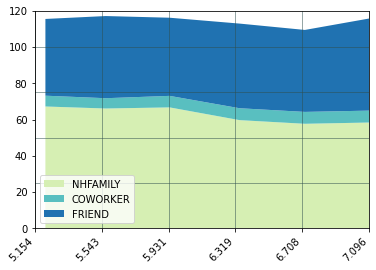

In [9]:
resp_df_trunc = resp_df[['NHFAMILY_NONWORK_TIME',
       'FRIEND_NONWORK_TIME', 'CCC_NONWORK_TIME',
        'NHSOCIAL_TIME', 'GTCBSA']]

resp_df_trunc = resp_df_trunc[~resp_df_trunc['GTCBSA'].isna()]
resp_df_trunc = resp_df_trunc[resp_df_trunc['GTCBSA'] > 0]
#resp_df_trunc.columns = resp_df_trunc.columns.tolist()[:-1]+['CBSA']
resp_df_trunc['GTCBSA'] = resp_df_trunc['GTCBSA'].astype(str).apply(lambda x: x.zfill(5))

cbsa_data_trunc = cbsa_data[['GTCBSA','LOG_POP']]
resp_df_trunc = resp_df_trunc.merge(cbsa_data_trunc, how='left',on='GTCBSA')

bins,partitions = bin_equal(resp_df_trunc['LOG_POP'],6)
resp_df_trunc['bins'] = bins

resp_binned = resp_df_trunc.groupby('bins').mean()
resp_binned

plt.stackplot(resp_binned['LOG_POP'], resp_binned['NHFAMILY_NONWORK_TIME'], resp_binned['CCC_NONWORK_TIME'], resp_binned['FRIEND_NONWORK_TIME'], labels=['NHFAMILY', 'COWORKER', 'FRIEND'],colors=clr_lst)
plt.legend(loc='lower left')#,bbox_to_anchor=(0.4, 0, 0.5, 0.5))
#plt.yscale('log')
plt.ylim((0,120))
plt.xlim((x[0],x[-1]))

for i in range(1,6):
    plt.plot(x, [25*i for j in range(len(x))], c='darkslategrey', linewidth=0.5)


for i in x:
    plt.axvline(x=i,c='darkslategrey',linewidth=0.5)

plt.xticks(x,rotation=45,ha='right')
plt.show()

In [14]:
len(bins)

31795

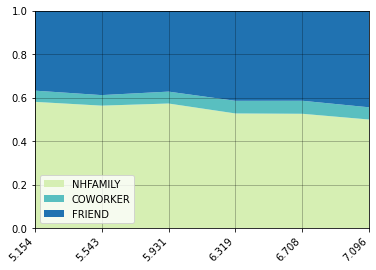

In [11]:
nhfam  = resp_binned['NHFAMILY_NONWORK_TIME']
cowork = resp_binned['CCC_NONWORK_TIME']
friend = resp_binned['FRIEND_NONWORK_TIME']

sum_time = [nhfam[i]+cowork[i]+friend[i] for i in range(len(nhfam))]

nhfam_norm  = [nhfam[i]/sum_time[i] for i in range(len(sum_time))]
cowork_norm = [cowork[i]/sum_time[i] for i in range(len(sum_time))]
friend_norm = [friend[i]/sum_time[i] for i in range(len(sum_time))]

plt.stackplot(x, nhfam_norm, cowork_norm, friend_norm, labels=['NHFAMILY', 'COWORKER', 'FRIEND'],colors=clr_lst)
plt.legend(loc='lower left')#,bbox_to_anchor=(0.4, 0, 0.5, 0.5))
#plt.yscale('log')
plt.ylim((0,1))
plt.xlim((x[0],x[-1]))

for i in range(1,6):
    plt.plot(x, [50*i for j in range(len(x))], c='black', linewidth=0.5,alpha=0.5)

for i in x:
    plt.axvline(x=i,c='black',linewidth=0.5,alpha=0.5)

for i in range(1,5):
    plt.axhline(y=i*0.2, c='black',linewidth=0.5,alpha=0.5)

plt.xticks(x,rotation=45,ha='right')
plt.show()